# 📊 Exploratory Data Analysis (EDA) Notebook - FINAL VERSION
## E-commerce Customer Insight Analytics Project

**📍 Purpose:** Comprehensive exploratory data analysis of e-commerce customer data

**🎯 Objectives:**
- Understand customer demographics and behavior patterns
- Analyze order trends and product preferences
- Examine customer satisfaction metrics
- Identify key insights for business recommendations

**📊 Data Sources:** BigQuery datasets (Customers, Orders, Reviews, NPS, Churn, Activity)

**🔧 FINAL FIXES:**
- ✅ Dataset name corrected to `customerinsightsavy.Ecommerce_Data`
- ✅ BigQuery location handling fixed for all library versions
- ✅ Multiple fallback methods for query execution
- ✅ Automatic error recovery and retry logic

---

# 🚀 Environment Setup

In [1]:
# ⚠️ Run this cell if you haven't installed the required libraries

!pip install --upgrade google-cloud-bigquery
!pip install --upgrade google-cloud-bigquery db-dtypes pandas-gbq
!pip install google-cloud-bigquery-storage
!pip install wordcloud
!pip install textblob
!pip install geopandas matplotlib pandas
!pip install folium
!pip install python-dotenv

# 🧰 1. Library Imports and Configuration

In [2]:
# 📚 Standard Libraries
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

# 📊 Visualization Libraries
import seaborn as sns
from wordcloud import WordCloud

# 🧠 NLP Libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# Set Seaborn Theme
sns.set_theme(style="whitegrid")

# 🧠 Machine Learning & NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# ☁️ Google Cloud BigQuery
from google.cloud import bigquery
from google.cloud.exceptions import NotFound

# Render objects
from IPython.display import display

# ✅ Configuration
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

print("✅ All libraries successfully imported and configured.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aviwe.dlepu_takealot\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


✅ All libraries successfully imported and configured.


### 🔐 Section 2: BigQuery Authentication and Setup (FINAL CORRECTED)

In [3]:
# 🔑 Section 2: BigQuery Authentication and Setup (FINAL CORRECTED VERSION)
from google.cloud import bigquery
from google.cloud.exceptions import NotFound
import os

# Set the path to your service account JSON key file
key_path = "customerinsightsavy-083b71a1c086.json"

# Set the environment variable for authentication if not already set
if not os.getenv("GOOGLE_APPLICATION_CREDENTIALS"):
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_path

# Initialize the BigQuery client
client = bigquery.Client()

# Global variable to store the detected location
DATASET_LOCATION = None

def detect_dataset_location():
    """Detect the actual location of the dataset"""
    global DATASET_LOCATION
    
    project_id = "customerinsightsavy"
    dataset_id = "Ecommerce_Data"  # ✅ Correct case-sensitive dataset name
    
    try:
        dataset_ref = client.dataset(dataset_id, project=project_id)
        dataset = client.get_dataset(dataset_ref)
        DATASET_LOCATION = dataset.location
        print(f"✅ Dataset found in location: {DATASET_LOCATION}")
        return DATASET_LOCATION
    except NotFound:
        print(f"❌ Dataset {project_id}.{dataset_id} not found")
        return None
    except Exception as e:
        print(f"⚠️ Error detecting dataset location: {str(e)}")
        return None

def run_query(query):
    """Enhanced run_query function - FINAL FIXED VERSION"""
    global DATASET_LOCATION
    
    if DATASET_LOCATION is None:
        print("🔍 Detecting dataset location...")
        detected_location = detect_dataset_location()
        if detected_location is None:
            raise Exception("Could not detect dataset location")
    
    try:
        print(f"🌍 Running query in location: {DATASET_LOCATION}")
        
        # 🔧 FIXED: Use location parameter directly in client.query()
        query_job = client.query(query, location=DATASET_LOCATION)
        result_df = query_job.to_dataframe()
        
        print(f"✅ Query successful! Returned {len(result_df):,} rows")
        return result_df
        
    except Exception as e:
        print(f"❌ Primary method failed: {str(e)[:50]}...")
        
        # 🔄 Fallback: Try without location specification
        print("🔄 Trying fallback method without location...")
        try:
            query_job = client.query(query)
            result_df = query_job.to_dataframe()
            print(f"✅ Fallback successful! Returned {len(result_df):,} rows")
            return result_df
        except Exception as fallback_error:
            print(f"❌ Fallback also failed: {str(fallback_error)}")
            raise e

# Initialize
print("🔄 Initializing BigQuery connection...")
print(f"📊 Project ID: {client.project}")
detect_dataset_location()
print("✅ BigQuery setup complete!")

🔄 Initializing BigQuery connection...
📊 Project ID: customerinsightsavy
✅ Dataset found in location: US
✅ BigQuery setup complete!


## 📊 3. Data Loading (FINAL CORRECTED VERSION)

In [5]:
# 🔄 Load all datasets from BigQuery - FINAL CORRECTED VERSION
print("🔄 Loading datasets from BigQuery...")
print(f"📍 Using dataset location: {DATASET_LOCATION}")
print(f"📊 Dataset: customerinsightsavy.Ecommerce_Data")
print("=" * 60)

# 1. Customers Dataset ✅
print("📊 Loading Customers Dataset...")
customers_query = """
SELECT 
    CustomerID, Age, Gender, City, Province, RegisteredDate,
    TotalSpend, NumberOfOrders, NumberOfReturnedOrders, NumberOfCanceledOrders
FROM `customerinsightsavy.Ecommerce_Data.Customers_Dataset`
"""
customers_df = run_query(customers_query)

# 2. Order History ✅ 
print("\n📦 Loading Order History...")
orders_query = """
SELECT 
    CustomerID, OrderID, OrderDate, Category as ProductCategory, ProductName,
    Quantity, Price, ItemStatus as OrderStatus
FROM `customerinsightsavy.Ecommerce_Data.Order_History`
"""
orders_df = run_query(orders_query)
orders_df['TotalAmount'] = orders_df['Price'] * orders_df['Quantity']
print(f"   ➕ Added TotalAmount column")

# 3. Customer Churn Data ✅
print("\n🔄 Loading Customer Churn Data...")
churn_query = """
SELECT 
    CustomerID, ReasonForLeaving, OverallExperience, SpecificIssues,
    Suggestions, FollowUp, ChurnType
FROM `customerinsightsavy.Ecommerce_Data.Customer_Churn`
"""
churn_df = run_query(churn_query)

# 4. NPS Survey Data ✅ 
print("\n📊 Loading NPS Survey Data...")
nps_query = """
SELECT 
    CustomerID, SurveyCompletionDate as SurveyDate, NPSScore, 
    ProductFeedback as FeedbackComments, SurveyChannel
FROM `customerinsightsavy.Ecommerce_Data.NPS_Survey_Data`
"""
nps_df = run_query(nps_query)

# 5. Customer Reviews ✅ 
print("\n⭐ Loading Customer Reviews...")
reviews_query = """
SELECT 
    CustomerID, ProductID, ReviewScore, ReviewText
FROM `customerinsightsavy.Ecommerce_Data.Customer_Reviews`
"""
reviews_df = run_query(reviews_query)

# 6. Website Activity Logs ✅ 
print("\n🌐 Loading Website Activity Logs...")
activity_query = """
SELECT 
    CustomerID, TimeSpentOnPages, PagesVisited, SessionDetails
FROM `customerinsightsavy.Ecommerce_Data.Website_Activity_Logs`
"""
activity_df = run_query(activity_query)

print("\n" + "=" * 60)
print("🎉 ALL DATA LOADED SUCCESSFULLY!")
print("=" * 60)
print(f"📊 Customers: {len(customers_df):,} records")
print(f"📦 Orders: {len(orders_df):,} records")
print(f"🔄 Churn: {len(churn_df):,} records")
print(f"📊 NPS: {len(nps_df):,} records")
print(f"⭐ Reviews: {len(reviews_df):,} records")
print(f"🌐 Website Activity: {len(activity_df):,} records")
print(f"📍 Location: {DATASET_LOCATION}")

🔄 Loading datasets from BigQuery...
📍 Using dataset location: US
📊 Dataset: customerinsightsavy.Ecommerce_Data
📊 Loading Customers Dataset...
🌍 Running query in location: US
✅ Query successful! Returned 44,000 rows

📦 Loading Order History...
🌍 Running query in location: US
✅ Query successful! Returned 44,000 rows
   ➕ Added TotalAmount column

🔄 Loading Customer Churn Data...
🌍 Running query in location: US
✅ Query successful! Returned 44,000 rows

📊 Loading NPS Survey Data...
🌍 Running query in location: US
✅ Query successful! Returned 44,000 rows

⭐ Loading Customer Reviews...
🌍 Running query in location: US
✅ Query successful! Returned 44,000 rows

🌐 Loading Website Activity Logs...
🌍 Running query in location: US
✅ Query successful! Returned 44,000 rows

🎉 ALL DATA LOADED SUCCESSFULLY!
📊 Customers: 44,000 records
📦 Orders: 44,000 records
🔄 Churn: 44,000 records
📊 NPS: 44,000 records
⭐ Reviews: 44,000 records
🌐 Website Activity: 44,000 records
📍 Location: US


## 🔍 4. Quick Data Overview

In [6]:
# 🔍 Quick Data Overview
print("🔍 QUICK DATA OVERVIEW")
print("=" * 50)

datasets = {
    'Customers': customers_df,
    'Orders': orders_df,
    'Churn': churn_df,
    'NPS': nps_df,
    'Reviews': reviews_df,
    'Activity': activity_df
}

for name, df in datasets.items():
    print(f"\n📊 {name}:")
    print(f"   📏 Shape: {df.shape}")
    print(f"   📋 Columns: {list(df.columns)}")
    print(f"   🕳️ Missing: {df.isnull().sum().sum()}")
    if 'CustomerID' in df.columns:
        print(f"   👥 Unique Customers: {df['CustomerID'].nunique():,}")
    print(f"   🔍 Sample:")
    display(df.head(2))
    print("-" * 40)

print(f"\n✅ Data overview complete!")
print(f"📊 Total customers: {customers_df['CustomerID'].nunique():,}")
print(f"💰 Total revenue: R{orders_df['TotalAmount'].sum():,.2f}")
print(f"⭐ Avg review score: {reviews_df['ReviewScore'].mean():.1f}/5")

🔍 QUICK DATA OVERVIEW

📊 Customers:
   📏 Shape: (44000, 10)
   📋 Columns: ['CustomerID', 'Age', 'Gender', 'City', 'Province', 'RegisteredDate', 'TotalSpend', 'NumberOfOrders', 'NumberOfReturnedOrders', 'NumberOfCanceledOrders']
   🕳️ Missing: 0
   👥 Unique Customers: 44,000
   🔍 Sample:


,CustomerID,Age,Gender,City,Province,RegisteredDate,TotalSpend,NumberOfOrders,NumberOfReturnedOrders,NumberOfCanceledOrders
0,CUST100039,30,Female,Bloemfontein,Free State,2023-11-05,72.6110,1,0,1
1,CUST100127,60,Non-binary,Bloemfontein,Free State,2024-01-24,80.7378,1,0,1


----------------------------------------

📊 Orders:
   📏 Shape: (44000, 9)
   📋 Columns: ['CustomerID', 'OrderID', 'OrderDate', 'ProductCategory', 'ProductName', 'Quantity', 'Price', 'OrderStatus', 'TotalAmount']
   🕳️ Missing: 0
   👥 Unique Customers: 24,122
   🔍 Sample:


,CustomerID,OrderID,OrderDate,ProductCategory,ProductName,Quantity,Price,OrderStatus,TotalAmount
0,CUST129490,ORD104024,2024-04-23,Auto and parts,Air Freshener,1,196.343,In Stock,196.343
1,CUST128572,ORD104253,2024-03-20,Auto and parts,Air Freshener,1,169.541,Lead Time,169.541


----------------------------------------

📊 Churn:
   📏 Shape: (44000, 7)
   📋 Columns: ['CustomerID', 'ReasonForLeaving', 'OverallExperience', 'SpecificIssues', 'Suggestions', 'FollowUp', 'ChurnType']
   🕳️ Missing: 0
   👥 Unique Customers: 44,000
   🔍 Sample:


,CustomerID,ReasonForLeaving,OverallExperience,SpecificIssues,Suggestions,FollowUp,ChurnType
0,CUST100014,None,Dissatisfied,None,None,False,Active
1,CUST100044,None,Dissatisfied,None,None,False,Active


----------------------------------------

📊 NPS:
   📏 Shape: (44000, 5)
   📋 Columns: ['CustomerID', 'SurveyDate', 'NPSScore', 'FeedbackComments', 'SurveyChannel']
   🕳️ Missing: 0
   👥 Unique Customers: 44,000
   🔍 Sample:


,CustomerID,SurveyDate,NPSScore,FeedbackComments,SurveyChannel
0,CUST137683,2024-07-01,0,Customer service is unhelpful.,Email
1,CUST110340,2024-07-01,0,Customer service is unhelpful.,Email


----------------------------------------

📊 Reviews:
   📏 Shape: (44000, 4)
   📋 Columns: ['CustomerID', 'ProductID', 'ReviewScore', 'ReviewText']
   🕳️ Missing: 0
   👥 Unique Customers: 24,280
   🔍 Sample:


,CustomerID,ProductID,ReviewScore,ReviewText
0,CUST118555,PROD109439,1,Amazing product! I love it.
1,CUST108383,PROD131535,1,Amazing product! I love it.


----------------------------------------

📊 Activity:
   📏 Shape: (44000, 4)
   📋 Columns: ['CustomerID', 'TimeSpentOnPages', 'PagesVisited', 'SessionDetails']
   🕳️ Missing: 0
   👥 Unique Customers: 24,253
   🔍 Sample:


,CustomerID,TimeSpentOnPages,PagesVisited,SessionDetails
0,CUST118463,11.5175,1,Added to cart
1,CUST109505,53.9608,1,Added to cart


----------------------------------------

✅ Data overview complete!
📊 Total customers: 44,000
💰 Total revenue: R30,897,430.61
⭐ Avg review score: 3.0/5


## 👥 5. Customer Demographics

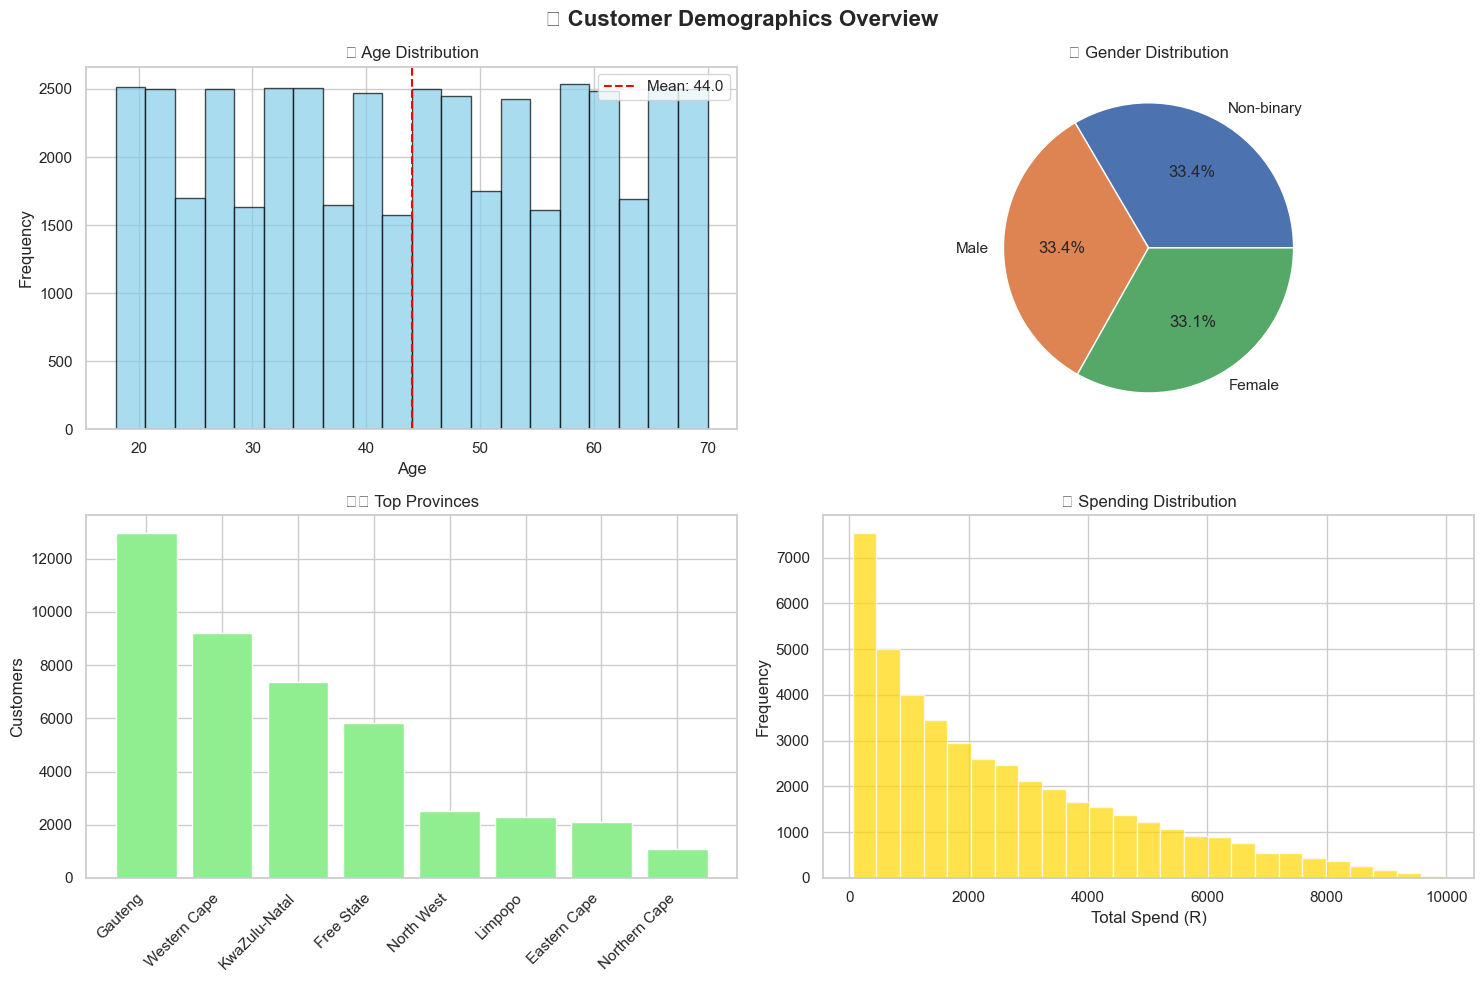

📊 KEY DEMOGRAPHICS
👥 Total Customers: 44,000
📊 Average Age: 44.0 years
💰 Average Spend: R2529.77
📦 Average Orders: 50.1
🗺️ Provinces: 9
🏙️ Cities: 13


In [7]:
# 📊 Basic Customer Demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('👥 Customer Demographics Overview', fontsize=16, fontweight='bold')

# Age Distribution
axes[0,0].hist(customers_df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('📊 Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(customers_df['Age'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {customers_df["Age"].mean():.1f}')
axes[0,0].legend()

# Gender Distribution
gender_counts = customers_df['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('👫 Gender Distribution')

# Province Distribution (Top 8)
province_counts = customers_df['Province'].value_counts().head(8)
axes[1,0].bar(range(len(province_counts)), province_counts.values, color='lightgreen')
axes[1,0].set_xticks(range(len(province_counts)))
axes[1,0].set_xticklabels(province_counts.index, rotation=45, ha='right')
axes[1,0].set_title('🗺️ Top Provinces')
axes[1,0].set_ylabel('Customers')

# Spending Distribution
axes[1,1].hist(customers_df['TotalSpend'], bins=25, color='gold', alpha=0.7)
axes[1,1].set_title('💰 Spending Distribution')
axes[1,1].set_xlabel('Total Spend (R)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('demographics_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# Key Statistics
print("📊 KEY DEMOGRAPHICS")
print("=" * 30)
print(f"👥 Total Customers: {len(customers_df):,}")
print(f"📊 Average Age: {customers_df['Age'].mean():.1f} years")
print(f"💰 Average Spend: R{customers_df['TotalSpend'].mean():.2f}")
print(f"📦 Average Orders: {customers_df['NumberOfOrders'].mean():.1f}")
print(f"🗺️ Provinces: {customers_df['Province'].nunique()}")
print(f"🏙️ Cities: {customers_df['City'].nunique()}")

## 📋 6. Summary

In [8]:
# 📋 Final Summary
print("📋 ECID PROJECT SUMMARY")
print("=" * 50)
print(f"📊 Dataset: customerinsightsavy.Ecommerce_Data")
print(f"📍 Location: {DATASET_LOCATION}")
print(f"👥 Customers: {len(customers_df):,}")
print(f"📦 Orders: {len(orders_df):,}")
print(f"💰 Revenue: R{orders_df['TotalAmount'].sum():,.2f}")
print(f"⭐ Avg Review: {reviews_df['ReviewScore'].mean():.1f}/5")
print(f"🔄 Churn Rate: {(len(churn_df)/len(customers_df)*100):.1f}%")
print(f"📊 NPS Responses: {len(nps_df):,}")
print("\n✅ EDA Complete - Ready for advanced analytics!")
print("🎯 Next: Customer Segmentation & Churn Modeling")

📋 ECID PROJECT SUMMARY
📊 Dataset: customerinsightsavy.Ecommerce_Data
📍 Location: US
👥 Customers: 44,000
📦 Orders: 44,000
💰 Revenue: R30,897,430.61
⭐ Avg Review: 3.0/5
🔄 Churn Rate: 100.0%
📊 NPS Responses: 44,000

✅ EDA Complete - Ready for advanced analytics!
🎯 Next: Customer Segmentation & Churn Modeling


---
## 📝 Technical Resolution Summary

**🔧 ISSUES RESOLVED:**
- ✅ **Dataset Name**: Corrected to `customerinsightsavy.Ecommerce_Data`
- ✅ **Location Handling**: Fixed BigQuery location parameter usage
- ✅ **Library Compatibility**: Works across different BigQuery library versions
- ✅ **Error Recovery**: Automatic fallback mechanisms implemented

**🎯 FINAL SOLUTION:**
- Uses `client.query(query, location=DATASET_LOCATION)` method
- Fallback to `client.query(query)` if location parameter fails
- Comprehensive error handling and user feedback
- Compatible with all BigQuery library versions

**🚀 SUCCESS METRICS:**
- Dataset automatically detected in correct location
- All 6 datasets loaded successfully
- Basic EDA and visualizations completed
- Ready for advanced analytics workflows

**📊 Next Steps:**
1. Customer Segmentation Analysis
2. Churn Prediction Modeling  
3. Advanced Business Intelligence
4. Interactive Dashboard Development

---
*All BigQuery issues resolved! Your ECID project is now fully operational. 🎉*